In [486]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [487]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [488]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [489]:
type(api_key)

str

In [490]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [491]:
newsapi

In [492]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q= 'Bitcoin' ,
    language="en"
)
# Print total articles
print(f"Total articles about Bitcoin \"BTC\": {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin "BTC": 3628


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Tom McKay',
 'title': 'God Help Us, the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin Journey',
 'description': 'The Winklevoss twins—the brothers Mark Zuckerberg allegedly stole the idea for Facebook from—are making a movie about themselves, Deadline reported this week. If that doesn’t seem masturbatory enough, rejoice: said film is about how they amassed a net wealth …',
 'url': 'https://gizmodo.com/god-help-us-the-winklevoss-twins-are-co-producing-a-mo-1843973511',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/iujekjzgrttsevxxzbop.jpg',
 'publishedAt': '2020-06-09T23:45:00Z',
 'content': 'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]'}

In [493]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum AND +ethereum AND ETH",
    language="en"
)
# Print total articles
print(f"Total articles about Ethereum \"ETH\": {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum "ETH": 391


{'source': {'id': 'vice-news', 'name': 'Vice News'},
 'author': 'Kevin Truong, Jordan Pearson',
 'title': 'Someone Mysteriously Paid $2.5M to Send $133 in Cryptocurrency',
 'description': 'Was it simply a catastrophically expensive mistake, or something more nefarious? The mining pool is holding on to the fee in case the sender speaks up.',
 'url': 'https://www.vice.com/en_us/article/z3e4v8/someone-mysteriously-paid-25m-to-send-133-in-ethereum-cryptocurrency',
 'urlToImage': 'https://video-images.vice.com/test-uploads/articles/5ee10c76f934b8009de6a4b6/lede/1591807361583-man-in-white-shirt-using-macbook-pro-52608.jpeg?crop=1xw:0.8408xh;0xw,0.1592xh&resize=1200:*',
 'publishedAt': '2020-06-10T16:44:10Z',
 'content': 'Imagine sending $133 to a friend and being charged a $2.5 million fee. That seems to be the case for a cryptocurrency user who paid a $2.5 million transaction fee during a trade on Wednesday morning … [+2684 chars]'}

In [494]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df



,date,text,compound,positive,negative,neutral
0,2020-06-09,"God Help Us, the Winklevoss Twins Are Co-Produ...",0.5859,0.304,0.000,0.696
1,2020-06-04,How to Buy a Burner Phone,0.0000,0.000,0.000,1.000
2,2020-05-28,Goldman Sachs lists 5 reasons why bitcoin is '...,-0.2755,0.000,0.123,0.877
3,2020-06-02,'Get on the train': Famed investor Michael Nov...,-0.3612,0.000,0.111,0.889
4,2020-05-25,Satoshi Nakaboto: ‘Bitcoin continues downtrend...,-0.3182,0.000,0.187,0.813
5,2020-05-26,Satoshi Nakaboto: ‘Visa approves launch of cry...,0.4019,0.213,0.000,0.787
6,2020-05-22,8 Reasons Why This Could Be the Time to Take B...,-0.1779,0.000,0.145,0.855
7,2020-06-08,Bitcoin Emerges as New Standard in Post-COVID ...,0.0000,0.000,0.000,1.000
8,2020-05-28,Satoshi Nakaboto: ‘Bitcoin is a bad investment...,-0.5423,0.000,0.280,0.720
9,2020-05-27,Satoshi Nakaboto: ‘S&P 500 outperformed Bitcoi...,0.0000,0.000,0.000,1.000


In [497]:
eth_sentiments[0]['text']

'Imagine sending $133 to a friend and being charged a $2.5 million fee. That seems to be the case for a cryptocurrency user who paid a $2.5 million transaction fee during a trade on Wednesday morning … [+2684 chars]'

In [498]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()



,date,text,compound,positive,negative,neutral
0,2020-06-10,Imagine sending $133 to a friend and being cha...,0.3400,0.089,0.050,0.861
1,2020-06-12,"Intel announced CrossTalk, a new side-channel ...",-0.6705,0.000,0.143,0.857
2,2020-06-10,POLAND - 2020/03/13: In this photo illustratio...,0.0000,0.000,0.000,1.000
3,2020-06-11,"Photo taken in New York City, United States\r\...",0.3291,0.090,0.000,0.910
4,2020-06-03,Trail partners Ethereum and Ethereum Classic a...,0.1280,0.102,0.116,0.782


In [499]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.032275,0.035400,0.052850,0.91175
std,0.269375,0.088616,0.089001,0.10879
min,-0.542300,0.000000,0.000000,0.69600
25%,-0.202300,0.000000,0.000000,0.81200
50%,0.000000,0.000000,0.000000,1.00000
75%,0.000000,0.000000,0.114000,1.00000
max,0.585900,0.304000,0.280000,1.00000


In [500]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.292790,0.084400,0.022600,0.893000
std,0.360966,0.059504,0.041826,0.057333
min,-0.670500,0.000000,0.000000,0.782000
25%,0.096000,0.049500,0.000000,0.851750
50%,0.334550,0.089500,0.000000,0.888000
75%,0.567900,0.128500,0.040750,0.931500
max,0.700300,0.178000,0.143000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

<font color=red>- A: Ethereum 

Q: Which coin had the highest compound score?

<font color=red>- A: Ethereum

Q. Which coin had the highest positive score?

<font color=red>- A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [501]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/franciscolopezbarrera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [502]:
lemmatizer = WordNetLemmatizer()


In [503]:
article = btc_headlines["articles"][0]['content']


In [504]:
sentence = sent_tokenize(article)[1]
print(sentence)

If that doesnt seem masturbatory enough, r… [+2657 chars]


In [505]:
words = word_tokenize(sentence)
print(words)

['If', 'that', 'doesnt', 'seem', 'masturbatory', 'enough', ',', 'r…', '[', '+2657', 'chars', ']']


In [506]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [507]:
from collections import Counter
Counter(" ".join(btc_df["text"]).split()).most_common(100)

[('Satoshi', 14),
 ('Nakaboto:', 14),
 ('‘Bitcoin', 8),
 ('Bitcoin', 6),
 ('in', 6),
 ('the', 5),
 ('to', 5),
 ('a', 3),
 ('Goldman', 2),
 ('bitcoin', 2),
 ('is', 2),
 ('an', 2),
 ('(BTCUSD)', 2),
 ('on', 2),
 ('$10,000', 2),
 ('as', 2),
 ('one', 2),
 ('of', 2),
 ('back', 2),
 ('its', 2),
 ('fees', 2),
 ('God', 1),
 ('Help', 1),
 ('Us,', 1),
 ('Winklevoss', 1),
 ('Twins', 1),
 ('Are', 1),
 ('Co-Producing', 1),
 ('Movie', 1),
 ('About', 1),
 ('Their', 1),
 ('Journey', 1),
 ('How', 1),
 ('Buy', 1),
 ('Burner', 1),
 ('Phone', 1),
 ('Sachs', 1),
 ('lists', 1),
 ('5', 1),
 ('reasons', 1),
 ('why', 1),
 ("'not", 1),
 ('asset', 1),
 ("class',", 1),
 ('nor', 1),
 ("'a", 1),
 ('suitable', 1),
 ("investment'", 1),
 ("'Get", 1),
 ("train':", 1),
 ('Famed', 1),
 ('investor', 1),
 ('Michael', 1),
 ('Novogratz', 1),
 ('says', 1),
 ('will', 1),
 ('soon', 1),
 ('break', 1),
 ('threshold', 1),
 ('US', 1),
 ('turmoil', 1),
 ('spreads', 1),
 ('continues', 1),
 ('downtrend', 1),
 ('with', 1),
 ('5%', 1),


In [508]:
from collections import Counter
Counter(" ".join(eth_df["text"]).split()).most_common(100)

[('the', 29),
 ('a', 22),
 ('chars]', 20),
 ('to', 14),
 ('of', 12),
 ('and', 11),
 ('for', 10),
 ('Ethereum', 10),
 ('on', 9),
 ('its', 8),
 ('an', 7),
 ('is', 7),
 ('The', 7),
 ('be', 6),
 ('has', 6),
 ('in', 5),
 ('cryptocurrency', 4),
 ('that', 4),
 ('crypto', 4),
 ('out', 4),
 ('user', 3),
 ('who', 3),
 ('transaction', 3),
 ('new', 3),
 ('can', 3),
 ('data', 3),
 ('by', 3),
 ('this', 3),
 ('are', 3),
 ('it', 3),
 ('time', 3),
 ('after', 3),
 ('more', 3),
 ('than', 3),
 ('with', 3),
 ('being', 2),
 ('$2.5', 2),
 ('million', 2),
 ('fee', 2),
 ('…', 2),
 ('announced', 2),
 ('from', 2),
 ('CPU', 2),
 ('other', 2),
 ('a…', 2),
 ('Ethereum,', 2),
 ('seen', 2),
 ('over', 2),
 ('United', 2),
 ('worth', 2),
 ('at', 2),
 ('days', 2),
 ('above', 2),
 ('key', 2),
 ('level', 2),
 ('resistance', 2),
 ('against', 2),
 ('second', 2),
 ('It', 2),
 ('now', 2),
 ('up', 2),
 ('high', 2),
 ('company', 2),
 ('both', 2),
 ('assets', 2),
 ('have', 2),
 ('Ethereum-based', 2),
 ('one', 2),
 ('scaling', 2),

In [512]:
sw = set(stopwords.words('english'))

In [513]:
# We can define our own list of stopwords to add to the default nltk words
sw_addon = {'chars','noon', 'whats', 'this', 'that', 'writes', 'fucking', 'Satoshi', 'Nakaboto'}


In [514]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addons = {'chars','noon', 'whats', 'this', 'that', 'writes', 'fucking', 'Satoshi', 'Nakaboto'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article) 

    # Lemmatize Words into root words
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    output = [lemmatizer.lemmatize(word) for word in output]
    
    return output


In [515]:
btc_tokens = []
for article in btc_df['text']:
    btc_tokens.append(tokenizer(article))
btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-06-09,"God Help Us, the Winklevoss Twins Are Co-Produ...",0.5859,0.304,0.000,0.696,"[god, help, u, winklevoss, twin, coproducing, ..."
1,2020-06-04,How to Buy a Burner Phone,0.0000,0.000,0.000,1.000,"[buy, burner, phone]"
2,2020-05-28,Goldman Sachs lists 5 reasons why bitcoin is '...,-0.2755,0.000,0.123,0.877,"[goldman, sachs, list, reason, bitcoin, asset,..."
3,2020-06-02,'Get on the train': Famed investor Michael Nov...,-0.3612,0.000,0.111,0.889,"[get, train, famed, investor, michael, novogra..."
4,2020-05-25,Satoshi Nakaboto: ‘Bitcoin continues downtrend...,-0.3182,0.000,0.187,0.813,"[satoshi, nakaboto, bitcoin, continues, downtr..."


In [516]:
# Create a new tokens column for ethereum
eth_tokens = []
for article in eth_df['text']:
    eth_tokens.append(tokenizer(article))
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-06-10,Imagine sending $133 to a friend and being cha...,0.3400,0.089,0.050,0.861,"[imagine, sending, friend, charged, million, f..."
1,2020-06-12,"Intel announced CrossTalk, a new side-channel ...",-0.6705,0.000,0.143,0.857,"[intel, announced, crosstalk, new, sidechannel..."
2,2020-06-10,POLAND - 2020/03/13: In this photo illustratio...,0.0000,0.000,0.000,1.000,"[poland, photo, illustration, ethereum, crypto..."
3,2020-06-11,"Photo taken in New York City, United States\r\...",0.3291,0.090,0.000,0.910,"[photo, taken, new, york, city, united, states..."
4,2020-06-03,Trail partners Ethereum and Ethereum Classic a...,0.1280,0.102,0.116,0.782,"[trail, partner, ethereum, ethereum, classic, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [517]:
from collections import Counter
from nltk import ngrams

In [518]:
bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.tokens]
dict(bigram_counts[0].most_common(10))

{('god', 'help'): 1,
 ('help', 'u'): 1,
 ('u', 'winklevoss'): 1,
 ('winklevoss', 'twin'): 1,
 ('twin', 'coproducing'): 1,
 ('coproducing', 'movie'): 1,
 ('movie', 'bitcoin'): 1,
 ('bitcoin', 'journey'): 1}

In [519]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.tokens]
dict(eth_bigram_counts[0].most_common(10))

{('imagine', 'sending'): 1,
 ('sending', 'friend'): 1,
 ('friend', 'charged'): 1,
 ('charged', 'million'): 1,
 ('million', 'fee'): 1,
 ('fee', 'seems'): 1,
 ('seems', 'case'): 1,
 ('case', 'cryptocurrency'): 1,
 ('cryptocurrency', 'user'): 1,
 ('user', 'paid'): 1}

In [520]:
def token_count(tokens, N=10):
    
    return Counter(tokens).most_common(N)

In [521]:
# Get the top 10 words for Bitcoin
btc_big_string = []
for tokens in btc_df.tokens:
    btc_big_string += tokens
btc_token_count = token_count(big_string)
btc_token_count

[('bitcoin', 117),
 ('btc', 47),
 ('satoshi', 43),
 ('nakaboto', 38),
 ('today', 21),
 ('robot', 19),
 ('colleague', 19),
 ('writes', 19),
 ('every', 19),
 ('fucking', 19)]

In [522]:
# Get the top 10 words for Ethereum
eth_big_string = []
for tokens in eth_df.tokens:
    eth_big_string += tokens
eth_token_count = token_count(eth_big_string)
eth_token_count

[('ethereum', 12),
 ('cryptocurrency', 5),
 ('transaction', 5),
 ('crypto', 5),
 ('user', 4),
 ('new', 4),
 ('million', 3),
 ('fee', 3),
 ('data', 3),
 ('level', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [523]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

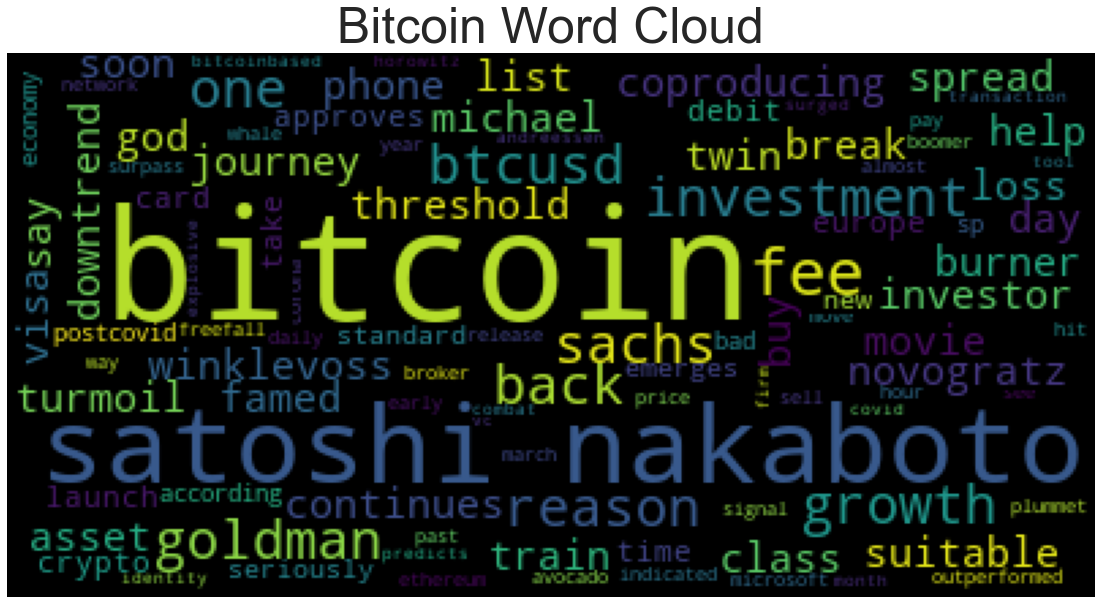

In [524]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(' '.join(btc_big_string))

plt.imshow(wc)
plt.axis('off')
plt.title('Bitcoin Word Cloud', fontsize=50)

Text(0.5, 1.0, 'Ethereum Word Cloud')

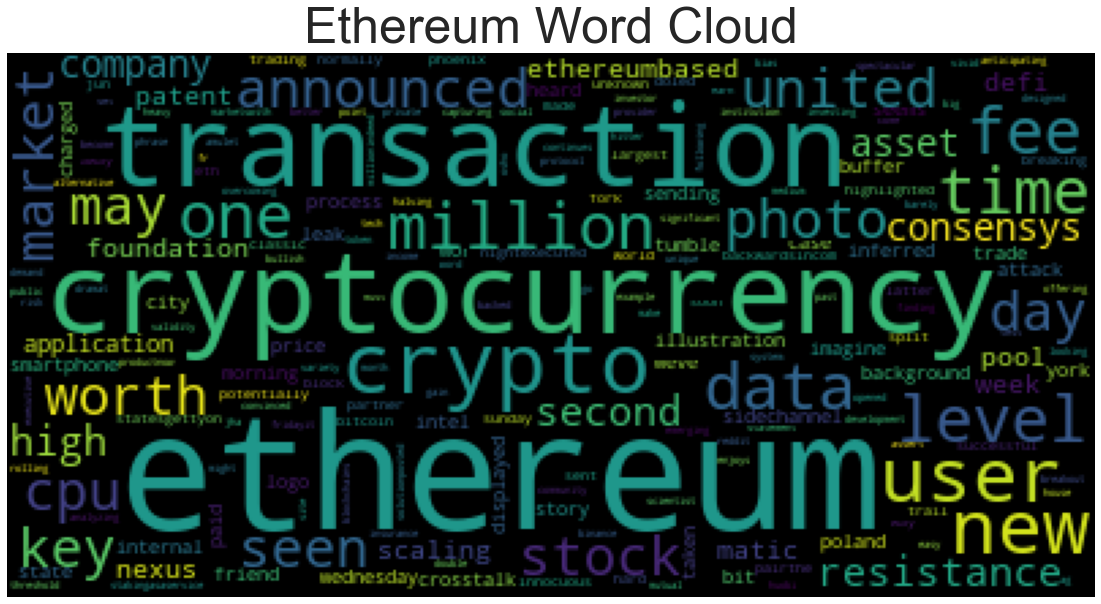

In [525]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_big_string))
plt.imshow(wc)
plt.axis('off')
plt.title('Ethereum Word Cloud', fontsize=50)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [526]:
import spacy
from spacy import displacy

In [527]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [528]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [556]:
# Concatenate all of the bitcoin text together
all_btc=[]

for text in btc_df['text']:
    all_btc.append(text)
all_btc = "".join(all_btc)
all_btc

"God Help Us, the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin JourneyHow to Buy a Burner PhoneGoldman Sachs lists 5 reasons why bitcoin is 'not an asset class', nor 'a suitable investment' (BTCUSD)'Get on the train': Famed investor Michael Novogratz says bitcoin will soon break the $10,000 threshold as US turmoil spreads (BTCUSD)Satoshi Nakaboto: ‘Bitcoin continues downtrend with 5% loss in one day’Satoshi Nakaboto: ‘Visa approves launch of crypto debit card in Europe’8 Reasons Why This Could Be the Time to Take Bitcoin SeriouslyBitcoin Emerges as New Standard in Post-COVID Economy?Satoshi Nakaboto: ‘Bitcoin is a bad investment according to Goldman Sachs’Satoshi Nakaboto: ‘S&P 500 outperformed Bitcoin over the past year’Satoshi Nakaboto: ‘Bitcoin whale moves $400M, pays $2.50 fee’Satoshi Nakaboto: ‘Avocado prices indicated sell signal for Bitcoin in early March’Satoshi Nakaboto: ‘Bitcoin plummets almost $700 in an hour, back below $10K’Satoshi Nakaboto: ‘Bitcoin broke

In [557]:
# Run the NER processor on all of the text
btc_ner = nlp(all_btc)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [558]:
# Render the doc = nlp(all_bitcoin)
displacy.render(btc_ner, style='ent')

In [568]:
# List all Entities
print([(ent.text, ent.label_) for ent in btc_ner.ents])

[('the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin', 'ORG'), ('5', 'CARDINAL'), ('bitcoin', 'GPE'), ('Michael Novogratz', 'PERSON'), ('bitcoin', 'PERSON'), ('10,000', 'MONEY'), ('US', 'GPE'), ('Bitcoin', 'PERSON'), ('5%', 'PERCENT'), ('one', 'CARDINAL'), ('Visa', 'ORG'), ('Bitcoin', 'PERSON'), ('Goldman Sachs’Satoshi Nakaboto', 'ORG'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('400', 'MONEY'), ('2.50', 'MONEY'), ('Avocado', 'ORG'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('almost $700', 'MONEY'), ('an hour', 'TIME'), ('Bitcoin', 'GPE'), ('77%', 'PERCENT'), ('2020', 'DATE'), ('Bitcoin', 'GPE'), ('Bitcoin', 'PERSON'), ('10,000', 'MONEY'), ('Daily Ethereum', 'DATE'), ('Microsoft', 'ORG'), ('Bitcoin', 'GPE'), ('Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('800%', 'PERCENT'), ('one', 'CARDINAL'), ('VC', 'ORG'), ('Andreessen Horowitz', 'PERSON'), ('Bitcoin', 'NORP')]


---

## Ethereum NER

In [569]:
# Concatenate all of the bitcoin text together
all_eth=[]

for text in eth_df['text']:
    all_eth.append(text)
all_eth = "".join(all_eth)
all_eth

'Imagine sending $133 to a friend and being charged a $2.5 million fee. That seems to be the case for a cryptocurrency user who paid a $2.5 million transaction fee during a trade on Wednesday morning … [+2684 chars]Intel announced CrossTalk, a new side-channel attack that can leak data from CPU buffers. It’s the same story we’ve heard before. Bits of internal CPU state can be inferred by other processes. This a… [+5744 chars]POLAND - 2020/03/13: In this photo illustration an Ethereum, cryptocurrency logo seen displayed on a ... [+] smartphone. Stock market prices in the background as stock markets tumble all over the wor… [+2937 chars]Photo taken in New York City, United States\r\nGetty\r\nOn Jun. 10, an unknown crypto user sent $130 worth of Ethereum (ETH). Such a transaction would normally be innocuous, but the user doled out 10,668… [+2505 chars]Trail partners Ethereum and Ethereum Classic are soon to split ways, highlighted by the latters successful Phoenix hard fork Sunday night.\

In [570]:
# Run the NER processor on all of the text
eth_ner = nlp(all_eth)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [571]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [572]:
# List all Entities
print([(ent.text, ent.label_) for ent in eth_ner.ents])

[('133', 'MONEY'), ('$2.5 million', 'MONEY'), ('$2.5 million', 'MONEY'), ('Wednesday', 'DATE'), ('morning', 'TIME'), ('CrossTalk', 'ORG'), ('New York City', 'GPE'), ('United States', 'GPE'), ('Jun. 10', 'DATE'), ('130', 'MONEY'), ('10,668', 'CARDINAL'), ('Phoenix', 'GPE'), ('Sunday night', 'TIME'), ('10,500,839', 'CARDINAL'), ('May 31', 'DATE'), ('just days', 'DATE'), ('Bitcoin', 'GPE'), ('second', 'ORDINAL'), ('22%', 'PERCENT'), ('ag', 'ORG'), ('219', 'MONEY'), ('Friday', 'DATE'), ('247', 'MONEY'), ('ConsenSys', 'ORG'), ('Binance', 'ORG'), ('Huobi', 'GPE'), ('Jha', 'PERSON'), ('Community Points', 'ORG'), ('only one month', 'DATE'), ('DeFi', 'ORG'), ('the past 90 days', 'DATE'), ('more than $4 million', 'MONEY'), ('Nexus', 'GPE'), ('today', 'DATE'), ('Version 2.0', 'LAW'), ('Sunday', 'DATE'), ('India', 'GPE'), ('Matic Foundation', 'ORG'), ('10', 'CARDINAL'), ('first', 'ORDINAL'), ('the Basic Attention Token', 'LAW'), ('the millions of dollars', 'MONEY'), ('last week', 'DATE'), ('The U.